# Kaushik Vejju EDA For SIF

In this exploratory data analysis (EDA), I will be using pandas and numpy  as well as the tools provided by SIF to analyze the fundamental and equity datasets. Visualizations such as graphs and tables will be shown as well as an explanation for them.

In [2]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import sif.sifinfra.sif_utils as su
import math

To start, I will display the equity data of Microsoft (MSFT) across a certain time period

In [3]:
start_date = datetime.datetime(2016, 10, 17)
end_date = datetime.datetime(2021, 10, 17)
msft_equity_df = pd.DataFrame(data = su.get_data('equity_raw', ['MSFT'],start_date, end_date))
msft_equity_df

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
0,MSFT,2019-11-29,152.100,152.30,151.280,151.38,11977300.0,148.820,151.38,2021-08-18
1,MSFT,2019-11-27,152.330,152.50,151.520,152.32,15201293.0,149.744,152.32,2021-08-18
2,MSFT,2019-11-26,151.360,152.42,151.320,152.03,24635100.0,149.459,152.03,2021-08-18
3,MSFT,2019-11-25,150.000,151.35,149.920,151.23,22428585.0,148.672,151.23,2021-08-18
4,MSFT,2019-11-22,150.070,150.30,148.820,149.59,15841680.0,147.060,149.59,2021-08-18
...,...,...,...,...,...,...,...,...,...,...
1254,MSFT,2021-07-30,285.170,286.66,283.910,284.91,20944846.0,284.362,284.91,2021-08-18
1255,MSFT,2021-10-07,295.175,296.64,293.920,294.85,20278045.0,294.850,294.85,2021-10-07
1256,MSFT,2021-09-13,297.550,298.54,294.080,296.99,21072228.0,296.990,296.99,2021-09-13
1257,MSFT,2021-10-14,299.210,303.27,297.830,302.75,27116206.0,302.750,302.75,2021-10-18


In [4]:
#reset index to 'date'
msft_equity_df = msft_equity_df.set_index('date')
msft_equity_df

,ticker,open,high,low,close,volume,dividends,closeunadj,lastupdated
date,,,,,,,,,
2019-11-29,MSFT,152.100,152.30,151.280,151.38,11977300.0,148.820,151.38,2021-08-18
2019-11-27,MSFT,152.330,152.50,151.520,152.32,15201293.0,149.744,152.32,2021-08-18
2019-11-26,MSFT,151.360,152.42,151.320,152.03,24635100.0,149.459,152.03,2021-08-18
2019-11-25,MSFT,150.000,151.35,149.920,151.23,22428585.0,148.672,151.23,2021-08-18
2019-11-22,MSFT,150.070,150.30,148.820,149.59,15841680.0,147.060,149.59,2021-08-18
...,...,...,...,...,...,...,...,...,...
2021-07-30,MSFT,285.170,286.66,283.910,284.91,20944846.0,284.362,284.91,2021-08-18
2021-10-07,MSFT,295.175,296.64,293.920,294.85,20278045.0,294.850,294.85,2021-10-07
2021-09-13,MSFT,297.550,298.54,294.080,296.99,21072228.0,296.990,296.99,2021-09-13


To start, I will be plotting closing prices for Microsoft

<AxesSubplot:xlabel='date'>

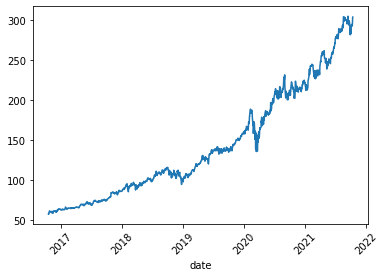

In [5]:
msft_equity_df.close.plot(rot=45)

I wanted to see how the closing prices of MSFT would differ from Apple. So, I decided to obtain Apple's data as well

In [6]:
aapl_equity_df = pd.DataFrame(data = su.get_data('equity_raw', ['AAPL'],start_date, end_date))

C:\Users\kaush\Desktop\Projects\GitRepos\sif\sif\sifinfra\sif_utils.py:253: DeprecationWarning: execute_query is a deprecated function. sifinfra.sif_utils is a deprecated module and will be removed in a future version of sif. Please remove calls to this module and replace them with alternatives from siftools.data_utils
  cols, response = execute_query(query, params=query_params)


In [7]:
aapl_equity_df = aapl_equity_df.set_index('date')
aapl_equity_df


,ticker,open,high,low,close,volume,dividends,closeunadj,lastupdated
date,,,,,,,,,
2019-11-15,AAPL,65.920,66.445,65.752,66.440,100374664.0,65.562,265.76,2021-08-06
2019-11-13,AAPL,65.282,66.195,65.267,66.118,103270372.0,65.244,264.47,2021-08-06
2019-11-11,AAPL,64.575,65.618,64.570,65.550,82029836.0,64.684,262.20,2021-08-06
2019-11-07,AAPL,64.685,65.088,64.528,64.858,94940332.0,64.000,259.43,2021-08-06
2019-11-05,AAPL,64.263,64.547,64.080,64.282,79897708.0,63.245,257.13,2021-08-06
...,...,...,...,...,...,...,...,...,...
2021-10-06,AAPL,139.470,142.150,138.370,142.000,82621764.0,142.000,142.00,2021-10-06
2021-08-26,AAPL,148.350,149.120,147.510,147.540,48242838.0,147.540,147.54,2021-08-26
2021-09-17,AAPL,148.820,148.820,145.760,146.060,129814894.0,146.060,146.06,2021-09-17


Once I printed out Apple's Equity Data, I decided to create a dataframe that combines both Microsoft and Apple's Closing Price
data

In [8]:
combine_close_df = pd.DataFrame({"MSFT": msft_equity_df.close, "AAPL": aapl_equity_df.close})

<AxesSubplot:title={'center':'Closing Price: AAPL vs MSFT'}, xlabel='date'>

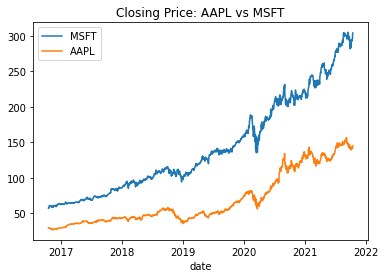

In [9]:
combine_close_df.plot(title = "Closing Price: AAPL vs MSFT")



Based on the graph above, it is seen that MSFT has a greater closing price compared to AAPL. However, both graphs are steadily increasing from 2017 to 2021.

Next, I wanted to examine how the rolling price of a particular company. I decided to look into Google in particular. Shown below is the result:
(Try to do another company as well)

In [17]:
#Google Dataframe
startTime_2 = datetime.datetime(2016, 10, 17)
endTime_2 = datetime.datetime(2019, 10, 17)
googl_df = pd.DataFrame(data = su.get_data('equity_raw', ['GOOGL'], startTime_2,endTime_2 ))
googl_df = googl_df.set_index('date')

#Rolling Average Of Closing Price
googl_df['Rolling'] = googl_df['close'].rolling(40).mean()
googl_df



C:\Users\kaush\Desktop\Projects\GitRepos\sif\sif\sifinfra\sif_utils.py:253: DeprecationWarning: execute_query is a deprecated function. sifinfra.sif_utils is a deprecated module and will be removed in a future version of sif. Please remove calls to this module and replace them with alternatives from siftools.data_utils
  cols, response = execute_query(query, params=query_params)


,ticker,open,high,low,close,volume,dividends,closeunadj,lastupdated,Rolling
date,,,,,,,,,,
2019-10-17,GOOGL,1251.40,1263.75,1249.87,1252.80,1063981.0,0.0,1252.80,2020-05-01,NaN
2019-10-16,GOOGL,1241.81,1254.19,1238.53,1243.00,1151028.0,0.0,1243.00,2020-05-01,NaN
2019-10-15,GOOGL,1221.50,1247.12,1220.92,1242.24,1527216.0,0.0,1242.24,2020-05-01,NaN
2019-10-14,GOOGL,1213.89,1225.88,1211.88,1217.77,683926.0,0.0,1217.77,2020-05-01,NaN
2019-10-11,GOOGL,1224.03,1228.75,1213.64,1215.71,1126452.0,0.0,1215.71,2020-05-01,NaN
...,...,...,...,...,...,...,...,...,...,...
2016-10-21,GOOGL,820.00,824.29,818.31,824.06,1615800.0,0.0,824.06,2018-06-13,794.56550
2016-10-20,GOOGL,827.56,828.47,820.55,821.63,1393900.0,0.0,821.63,2018-06-13,794.86025
2016-10-19,GOOGL,822.88,829.80,822.88,826.84,1500100.0,0.0,826.84,2018-06-13,795.14000


<AxesSubplot:title={'center':'GOOGL: Closing Price vs Rolling Average'}, xlabel='date'>

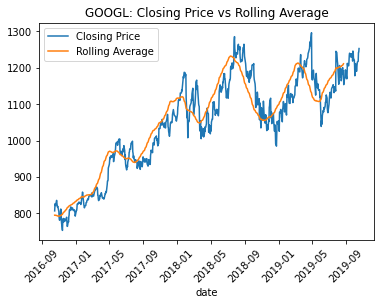

In [23]:
#Plot Of Rolling Data
googl_close_rolling_df = pd.DataFrame({"Closing Price": googl_df['close'], "Rolling Average": googl_df['Rolling']})
googl_close_rolling_df.plot(rot = 45, title ='GOOGL: Closing Price vs Rolling Average')

Based on the graph above, it can be seen that the closing price and the rolling price are follow the same pattern. This makes sense since in order to calculate the rolling price, the closing price data is needed.

Next, I wanted to plot a scatter plot that examines the relationship between a stock's volume and its closing price. I worked with the GOOGL dataframe to do this.

<AxesSubplot:xlabel='close', ylabel='volume'>

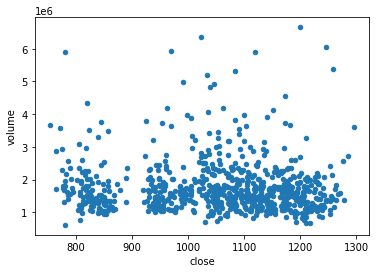

In [89]:
googl_df.plot.scatter(x = 'close', y = 'volume')

Based on the resulting scatterplot, I wanted to look at the r value.

In [90]:
correlation = googl_df.close.corr(googl_df.volume)
correlation

-0.03403049724285122

-0.034 is a very low value. This suggests that the close price is not related to the volume. I did not expect this. As someone who is relatively new to finance and how markets work, I expected that higher closing prices would be indicative of high volumes.

Next, I will be creating a histogram that plots the revenue of all firms in a market.

In [91]:
all_df = pd.DataFrame(data = su.get_data('fundamental_raw', [],datetime.datetime(2013, 10, 17), datetime.datetime(2019, 10, 17) ))


C:\Users\kaush\Desktop\Projects\GitRepos\sif\sif\sifinfra\sif_utils.py:253: DeprecationWarning: execute_query is a deprecated function. sifinfra.sif_utils is a deprecated module and will be removed in a future version of sif. Please remove calls to this module and replace them with alternatives from siftools.data_utils
  cols, response = execute_query(query, params=query_params)


In [94]:
#Display the histogram, but remove any outliers first
all_df.revenue = all_df.revenue.dropna()
all_df.revenue.max()

#Create a numpy array of the revenue column in order to remove outliers that will skew the histogram
all_df_arr = np.array(all_df.revenue)
all_df_arr

array([4.075e+09, 4.376e+09, 4.418e+09, ..., 0.000e+00, 0.000e+00,
       0.000e+00])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

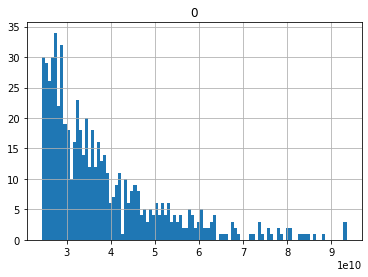

In [97]:
all_df_arr = [x for x in all_df_revenue if 1e+05 <= x <= 1e+11 ]

#Create a dataframe containing all_df_revenue
all_revenue_df = pd.DataFrame(all_df_arr)
all_revenue_df.hist(bins=100)

The histogram above is skewed to the right. Many firms have revenues that are 2e10 to 3e10. However, as the total revenue
increases, the number of firms who acheieve this revenue decreases. This distribution is NOT normal.

Finally, we will be creating a table that joins at least one fundamental factor with one equity factor. The relationship of these two factors will be plotted. For this part, I will be looking at data from Tesla.

In [134]:
# equity data frame
tsla_df_equity = pd.DataFrame(data = su.get_data('equity_raw', ['TSLA'], start_date,end_date ))

C:\Users\kaush\Desktop\Projects\GitRepos\sif\sif\sifinfra\sif_utils.py:253: DeprecationWarning: execute_query is a deprecated function. sifinfra.sif_utils is a deprecated module and will be removed in a future version of sif. Please remove calls to this module and replace them with alternatives from siftools.data_utils
  cols, response = execute_query(query, params=query_params)


In [135]:
#Set index to data and display the 'close' data
tsla_df_equity = tsla_df_equity.set_index('date')
tsla_df_equity.close

date
2019-11-29     65.988
2019-11-27     66.258
2019-11-26     65.784
2021-03-11    699.600
2019-11-25     67.268
               ...   
2021-08-04    710.920
2021-07-30    687.200
2021-10-07    793.610
2021-09-13    743.000
2021-10-14    818.320
Name: close, Length: 1259, dtype: float64

In [136]:
# fundamental data frame
tsla_df_fundamental = pd.DataFrame(data = su.get_data('fundamental_raw', ['TSLA'], start_date,end_date ))

C:\Users\kaush\Desktop\Projects\GitRepos\sif\sif\sifinfra\sif_utils.py:253: DeprecationWarning: execute_query is a deprecated function. sifinfra.sif_utils is a deprecated module and will be removed in a future version of sif. Please remove calls to this module and replace them with alternatives from siftools.data_utils
  cols, response = execute_query(query, params=query_params)


In [137]:
tsla_df_fundamental

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,TSLA,ARQ,2016-09-30,2016-11-02,2016-09-30,2021-10-25,25310000.0,1.259240e+10,None,5.172412e+09,...,749455950.0,744955000.0,744955000.0,3.085,1.259240e+10,0.0,8133000.0,0.0,16.904,1.090022e+09
1,TSLA,ARQ,2016-12-31,2017-03-01,2016-12-31,2021-10-25,-23740000.0,2.266408e+10,None,6.259796e+09,...,808352140.0,775525000.0,775525000.0,2.946,2.228793e+10,0.0,11070000.0,0.0,28.739,4.327910e+08
2,TSLA,ARQ,2017-03-31,2017-05-10,2017-03-31,2021-10-25,-20769000.0,2.505373e+10,None,7.027889e+09,...,821298680.0,810645000.0,810645000.0,3.326,2.462413e+10,0.0,25278000.0,0.0,30.376,7.824500e+08
3,TSLA,ARQ,2017-06-30,2017-08-04,2017-06-30,2021-10-25,10961000.0,2.604370e+10,None,6.359444e+09,...,834435115.0,826060000.0,826060000.0,3.377,2.561909e+10,0.0,15647000.0,0.0,31.014,-1.869110e+08
4,TSLA,ARQ,2017-09-30,2017-11-03,2017-09-30,2021-10-25,21250000.0,2.810707e+10,None,7.068733e+09,...,840336975.0,836470000.0,836470000.0,3.568,2.768960e+10,0.0,-285000.0,0.0,33.103,5.997930e+08
5,TSLA,ARQ,2017-12-31,2018-02-23,2017-12-31,2021-10-25,33348000.0,2.865537e+10,None,6.570520e+09,...,844599705.0,841705000.0,841705000.0,3.907,2.823363e+10,0.0,-9094000.0,0.0,33.543,-1.104150e+09
6,TSLA,ARQ,2018-03-31,2018-05-07,2018-03-31,2021-10-25,82921000.0,2.727143e+10,None,6.383920e+09,...,848968425.0,845730000.0,845730000.0,4.031,2.686372e+10,0.0,5605000.0,0.0,31.764,-2.266439e+09
7,TSLA,ARQ,2018-06-30,2018-08-06,2018-06-30,2021-10-25,18545000.0,2.791000e+10,None,6.699797e+09,...,852965720.0,849985000.0,849985000.0,4.709,2.754531e+10,0.0,13707000.0,0.0,32.407,-2.441565e+09
8,TSLA,ARQ,2018-09-30,2018-11-02,2018-09-30,2021-10-25,8271000.0,2.926271e+10,None,7.920491e+09,...,858663875.0,854465000.0,854465000.0,7.987,2.890601e+10,0.0,16647000.0,0.0,33.829,-1.854833e+09
9,TSLA,ARQ,2018-12-31,2019-02-19,2018-12-31,2021-10-25,-8218000.0,2.973961e+10,None,8.306308e+09,...,863607435.0,860215000.0,860215000.0,8.400,2.938896e+10,0.0,21878000.0,0.0,34.165,-1.685828e+09


In [138]:
# reset index
tsla_df_fundamental = tsla_df_fundamental.set_index('calendardate')

In [139]:
tsla_df_fundamental.assets

calendardate
2016-09-30    1.259240e+10
2016-12-31    2.266408e+10
2017-03-31    2.505373e+10
2017-06-30    2.604370e+10
2017-09-30    2.810707e+10
2017-12-31    2.865537e+10
2018-03-31    2.727143e+10
2018-06-30    2.791000e+10
2018-09-30    2.926271e+10
2018-12-31    2.973961e+10
2019-03-31    2.891252e+10
2019-06-30    3.187260e+10
2019-09-30    3.279500e+10
2019-12-31    3.430900e+10
2020-03-31    3.725000e+10
2020-06-30    3.813500e+10
2020-09-30    4.569100e+10
2020-12-31    5.214800e+10
2021-03-31    5.297200e+10
2021-06-30    5.514600e+10
Name: assets, dtype: float64

In [140]:
# Creating a dataframe that combines the assets and close data of TSLA
tsla_combined_df = pd.DataFrame({"Closing Price": tsla_df_equity.close, "Assets": tsla_df_fundamental.assets})

The TSLA Table For Closing Price & Assets

In [149]:
tsla_combined_df = tsla_combined_df.dropna()
tsla_combined_df

,Closing Price,Assets
2017-03-31,55.660,2.505373e+10
2017-06-30,72.322,2.604370e+10
2018-12-31,66.560,2.973961e+10
2019-09-30,48.174,3.279500e+10
2019-12-31,83.666,3.430900e+10
2020-03-31,104.800,3.725000e+10
2020-06-30,215.962,3.813500e+10
2020-09-30,429.010,4.569100e+10
2020-12-31,705.670,5.214800e+10
2021-03-31,667.930,5.297200e+10


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

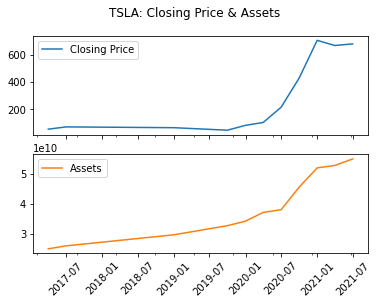

In [151]:
tsla_combined_df.plot(subplots = True, rot = 45, title = 'TSLA: Closing Price & Assets')

The plot above shows how the closing price and assets of TSLA are changing from 2017 to 2021. These graphs have a very similar shape. Both increase steadily from 2017 to 2019 but begin to spike around 2020. The closing price for TSLA in particular increased greatly in 2020. The assets graph does this well.

This is the end of the EDA. We were able to learn more about Python sytnax and become more familiar with pandas and numpy.